In [8]:
# A model will be built based on ML classification algorithm in order to classify images of different persons

In [9]:
# Importing necessary libraries 

import matplotlib.image as mpi
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import pandas as pd

In [10]:
# The steps are -  As it has raw images...creating cropped faces (basically detection of faces of all the images, and also discarding some images where
# faces are covered)..... then a manual data cleaning process ( where we delete unwanted images)... .. Next is 
# wavelet transformation and feature engineering (extracting the features from the cropped images in an effective way)... 
# then Vertical stacking of RAW and Wavelet transformed images, then Training the model... ....Finally Saving the model.

In [11]:
img = cv2.imread("D:/My Study Workstation/ML projects/Classification/MAin Data/Model/test_images/2.JPEG")
img.shape

(202, 249, 3)

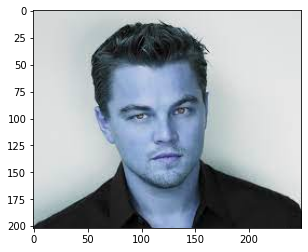

In [12]:
plt.imshow(img)

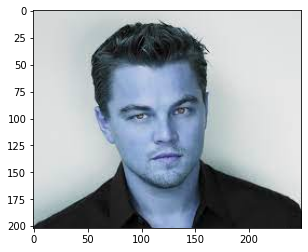

In [14]:
plt.imshow(img)

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

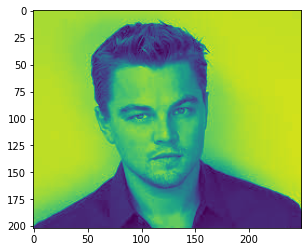

In [16]:
plt.imshow(gray)

In [17]:
gray.shape

(202, 249)

In [18]:
gray

array([[216, 216, 216, ..., 224, 224, 224],
       [216, 216, 216, ..., 224, 224, 224],
       [216, 216, 216, ..., 224, 224, 224],
       ...,
       [175, 105,  41, ...,  26,  26,  23],
       [ 67,  38,  28, ...,  22,  22,  23],
       [ 66,  38,  28, ...,  22,  22,  23]], dtype=uint8)

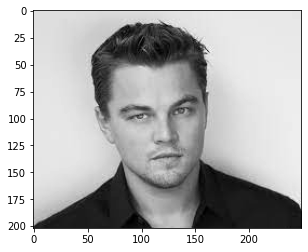

In [19]:
plt.imshow(gray, cmap='gray')

In [20]:
# face detection

face_cascade = cv2.CascadeClassifier("D:/My Study Workstation/ML projects/Classification/MAin Data/Model/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("D:/My Study Workstation/ML projects/Classification/MAin Data/Model/OpenCV/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 65,  54, 109, 109]])

In [21]:
# Drawing the face .. as face is 2D array.. so detecting the first face and storing that into x,y,h,w values

(x,y,w,h) = faces[0]
x,y,w,h

(65, 54, 109, 109)

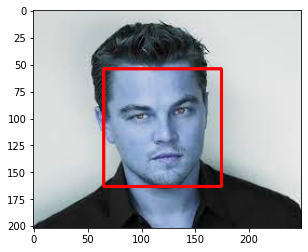

In [22]:
# now once the face is located... drawing rectangle (bounding box) around that using OpenCV

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

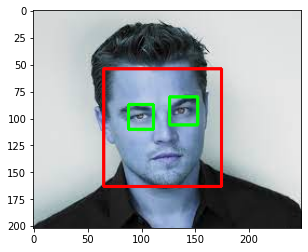

In [23]:
# now drawing the 2 eyes

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

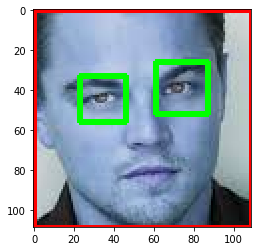

In [24]:
plt.imshow(roi_color)
# here getting a cropped face..the region of interest

In [25]:
# so, cropping all the faces of all images,, and storing in a folder, and will use that for model training

In [26]:
# now, writing a function, input image will be given, and the function will return the cropped face image, if 
# the face and 2 eyes are detected clearly

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
        # cache: function --> if it has two images, it'll return only first image

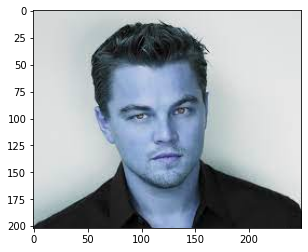

In [27]:
# original image first
original_image = cv2.imread("D:/My Study Workstation/ML projects/Classification/MAin Data/Model/test_images/2.JPEG")
plt.imshow(original_image)

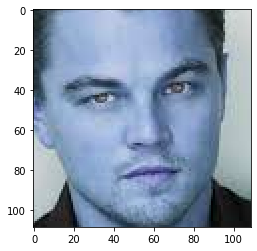

In [28]:
# running the above function on this image

cropped_image = get_cropped_image_if_2_eyes("D:/My Study Workstation/ML projects/Classification/MAin Data/Model/test_images/2.JPEG")
plt.imshow(cropped_image)

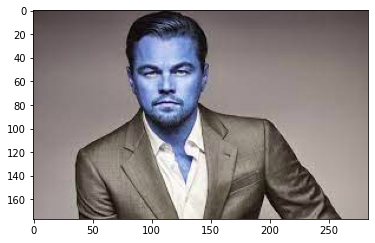

In [29]:
# now, this function will return nothing if the image doesn't have 2 clearly distinguisable eyes... it will ignore that image

# Testing rhe function behaviour for this image

org_image_obs = cv2.imread("D:/My Study Workstation/ML projects/Classification/MAin Data/Model/test_images/1.JPEG")
plt.imshow(org_image_obs)

In [30]:
# now running the get cropped function.. 

cropped_image_obs_obs = get_cropped_image_if_2_eyes("D:/My Study Workstation/ML projects/Classification/MAin Data/Model/test_images/1.JPEG")
cropped_image_obs_obs

In [31]:
# it is returning none... ...which means the face/eyes are not that clear or may be small or
# obstructed, and it will ignore this image

In [35]:
# Now, in the dataset folder, creating one new folder - CROPPED..

path_to_data = 'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Dataset/'
path_to_cr_data = 'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/'

In [36]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [37]:
img_dirs

['D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Dataset/lionel_messi',
 'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Dataset/maria_sharapova',
 'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Dataset/roger_federer',
 'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Dataset/serena_williams',
 'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Dataset/virat_kohli']

In [38]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [39]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi
Generating cropped images in folder:  D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/maria_sharapova
Generating cropped images in folder:  D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/roger_federer
Generating cropped images in folder:  D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/serena_williams
Generating cropped images in folder:  D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/virat_kohli


In [40]:
# now, after this step.. some manual data cleaning, as there are some images of humans in those folders, but not necessarily of 
# that particular person ..so just manually removing them from each of the folder

# now, afetr the manual data cleaning it is a CLEAN dataset

In [43]:
# Next is FEATURE ENGINEERING
# Wavelet transform...  features generation

In [41]:
import pywt
  

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    return imArray_H

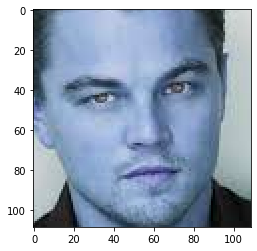

In [42]:
plt.imshow(cropped_image)

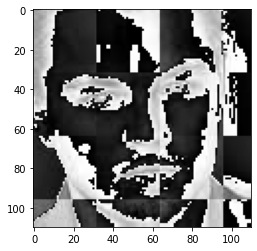

In [43]:
im_har = w2d(cropped_image, 'db1',5)
plt.imshow(im_har, cmap='gray')

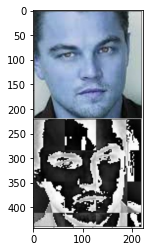

In [44]:
# now performing Wavelet transformation for all the images for the cropped folders

demo1 = mpi.imread("D:/My Study Workstation/ML projects/Classification/Screenshot demo data/org.JPG")
plt.imshow(demo1)

In [45]:
# now calling dictionary.. it has the key, which is the person_name.. and the values are the cropped images
celebrity_file_names_dict

{'lionel_messi': ['D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi1.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi2.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi3.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi4.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi5.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi6.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi7.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Experiment/lionel_messi/lionel_messi8.png',
  'D:/My Study Workstation/ML projects/Classification/MAin Data/Model/Ex

In [46]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [47]:
X, y = [], []


for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img) 
        y.append(class_dict[celebrity_name])

In [48]:
len(X)

186

In [49]:
len(X[0])
# size of each image is 4096 ( which is 32*32*3 plus for the WVLT image another 32*32 ... so total 4096)

4096

In [50]:
# first image

X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [51]:
len(y)

186

In [52]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(186, 4096)

In [53]:
y[0]

0

In [54]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [59]:
# Now it is ready for model training

# first taking SVM as classifier..then looking at the performance...proceeding..
# ..after that, using grid-search-cv checking few other Classifiers

In [55]:
# now importing all necessary algos
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

# so here, getting 80% accuracy, even without using neural network ... (though it is tested on a small sample)

0.8085106382978723

In [81]:
len(X_test)

47

In [82]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.56      0.83      0.67         6
           2       0.75      0.60      0.67         5
           3       0.86      0.86      0.86         7
           4       0.94      0.88      0.91        17

    accuracy                           0.81        47
   macro avg       0.78      0.78      0.78        47
weighted avg       0.83      0.81      0.81        47



In [104]:
# now, let's taking grid-search-cv 
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=False),
        'params' : {
             'svc__C': [1,10,100,1000],
             'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
         'params' : {
              'randomforestclassifier__n_estimators': [1,5,10]
         }
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
         'params': {
              'logisticregression__C': [1,5,10]
         }
    }, 
    

    
    'GaussianNB' : {
        'model': GaussianNB(),
        'params' : {
            
            
        }},
    
        
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            
        }}
       
        
}

In [105]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.698413,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.626190,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.770106,{'logisticregression__C': 5}
3,GaussianNB,0.690741,{}
4,KNeighborsClassifier,0.619577,{}


In [106]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))]),
 'GaussianNB': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())]),
 'KNeighborsClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())])}

In [110]:
# testing 

best_estimators['svm'].score(X_test, y_test)

0.8085106382978723

In [111]:
best_estimators['random_forest'].score(X_test, y_test)

0.6170212765957447

In [112]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7872340425531915

In [114]:
best_estimators['KNeighborsClassifier'].score(X_test, y_test)

0.6382978723404256

In [115]:
# now, using SVM...storing that into best_classifier

best_clf = best_estimators['svm']

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  2,  0,  1,  0],
       [ 0,  5,  1,  0,  0],
       [ 1,  0,  3,  0,  1],
       [ 0,  1,  0,  6,  0],
       [ 1,  1,  0,  0, 15]], dtype=int64)

Text(69.0, 0.5, 'Truth')

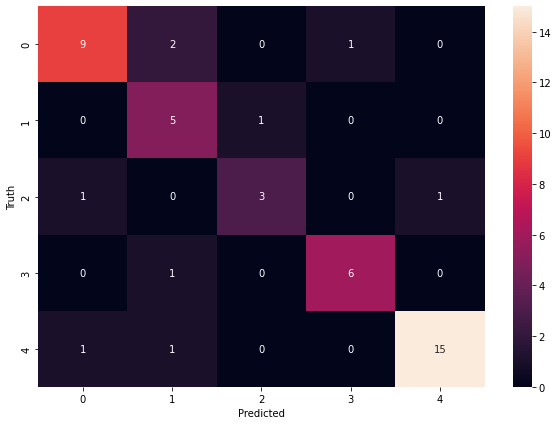

In [117]:
# the same confusion matrix, but with better visualization, seaborn

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [120]:
# so, saving the model to a file, using joblib

import joblib 
joblib.dump(best_clf, 'D:/My Study Workstation/ML projects/Classification/Final_saved_model.pkl')


['D:/My Study Workstation/ML projects/Classification/Final_saved_model.pkl']

In [121]:
# also saving class dictionary
import json
with open("D:/My Study Workstation/ML projects/Classification/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))